In [1]:
import rfest

from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt
%matplotlib inline



## Generate toy dataset

RFEst comes with a simple data generator. Here we generated a stimulus-response pair with a 3D Difference-of-Gaussian filter.

In [2]:
((X, Y), (Xtest, Ytest), 
 w_true) = rfest.make_data(dims=(15, 20, 5), sigma=(1.5, 1.5),
                           n_samples=2000, nsevar=1, 
                           filter_type='mexican_hat', seed=2046)
                          

### ASD

In [3]:
def callback_asd(params, t, g):
    if t % 100 == 0:
        print('============{}============'.format(t))
        for param in params:
            print('params: {0}'.format(param))    
            
asd = rfest.ASD(X, Y, rf_dims=(15,20,5))

# let's use magic initial params
# to shorten optimization time.
asd.fit(initial_params=([8.,6.,[3., 3.]]),num_iters=300,
                       callback=callback_asd)

print('============Optimized============')
for param in asd.optimized_params:
    print('params: {0}'.format(param)) 

============0============
params: 8.0
params: 6.0
params: [array(3.), array(3.)]
============100============
params: 7.899735102792264
params: 5.900517170749898
params: [array(3.0986561), array(3.0986561)]
============200============
params: 7.798749615012591
params: 5.802053483978133
params: [array(3.18824878), array(3.18824878)]
============Optimized============
params: 7.697154619189625
params: 5.7041063465541875
params: [array(3.2407577), array(3.2407577)]


Text(0.5,1,'t_asd')

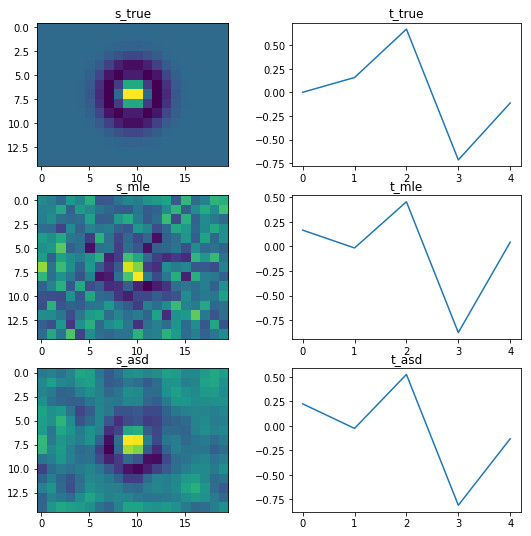

In [4]:
U_true, S, Vt_true = randomized_svd(w_true.reshape(300,5), 3)

fig, ax = plt.subplots(3,2, figsize=(9, 9))
ax[0, 0].imshow(U_true[:, 0].reshape(15, 20))
ax[0, 1].plot(Vt_true[0])

ax[1, 0].imshow(asd.sRF_mle)
ax[1, 1].plot(asd.tRF_mle)

ax[2, 0].imshow(asd.sRF_opt)
ax[2, 1].plot(asd.tRF_opt)


ax[0,0].set_title('s_true')
ax[0,1].set_title('t_true')

ax[1,0].set_title('s_mle')
ax[1,1].set_title('t_mle')

ax[2,0].set_title('s_asd')
ax[2,1].set_title('t_asd')